# <font color = blue><div dir = rtl>  הסימולציה  </div></font>
<font color = black> <div dir = rtl> הסימולציה* מציגה לנו באופן ויזואלי סיטואציה מחיי היומיום במטרה לחקור מאפיין פיזיקלי מסוים. במקרה זה, עוצמת קרן אור לאחר החזרה ממשטח. <br> הסימולציה מבוססת על חוק פרנל וחוק סנל. הסימולציה מבודדת את כל המשתנים הפיזיקליים פרט לסוג המשטח בו הקרן פוגעת וזווית הפגיעה של הקרן במשטח. <br> <br> *הדמיה </div></font> 






### <div dir =rtl> שאלות החקר :

#### <div dir = rtl><u>כיצד החומר שממנו עשוי המשטח משפיע על עצמת קרן האור החוזרת ממנו?</u></div>
#### <div dir = rtl><u>כיצד זווית הפגיעה במשטח משפיעה על עצמת קרן האור החוזרת ממנו?</u></div>

### <font color = blue><div dir = rtl>  הרצת קטע קוד זה תכניס נתונים לסימולציה על פי בחירת המשתמש </div></font>

In [1]:
import math

#הגדרת קבועים בפונקציה
max_intensity = 150000
mini_intensity = 1
max_theta = 90
mini_theta = 0

#מילון המכיל את החומרים שנשתמש בהם הניסוי עם מקדמי השבירה
n_by_materials = {'water' : 1.331, 'glass' : 1.51, 'ice' : 1.307, 'milk' : 1.35, 'olive oil' : 1.535, 'acetone' : 1.357}

def get_arguments(n_by_materials):
    """the function doesn't get arguments and returns dictionary with the data for the simulation.
    the function checks if the input arguments are valids."""
    
    simulate_data = {} #מילון שמחזיק את הנתונים להרצה ספציפית של הסימולציה

    intensity = 0 #ברירת מחדל של עוצמת קרן
    while intensity > max_intensity or intensity < mini_intensity: #בניית לולאה הבודקת את תקינות הערכים
        #קליטת ערכים מהמשתמש
        intensity = int(input('Type the intensity of the beam of light: (in lux, between 1 - 150000)'))
        if intensity > max_intensity or intensity < mini_intensity: #בודקת את החוקיות
            print ('Error! invalid value. Please type valid value.') #הדפסת הודעה מתאימה
    
    simulate_data['intensity'] = intensity #מוסיף למילון

    n1 = 1.0003 #מקדם השבירה של האוויר
    simulate_data['n1'] = n1 #מוסיף למילון
    
    n2 = None #ברירת מחדל של חומר שני
    material_list = [key for key in n_by_materials] #רשימת החומרים
    simulate_data['material_list'] = material_list
    while n2 == None: #יצירת לולאה הבודקת את חוקיות האיברים
        print('Choose material from the list:', material_list) #מציג למשתמש את החומרים לבחירה ומקבל את הבחירה כקלט
        input_material = input('material = ') #המשתנה מקבל מהמשתמש את החומר שיבדק
        simulate_data['material'] = input_material
        n2 = n_by_materials.get(input_material) #מקבלת את מקדם השבירה של החומר לתוך המשתנה
        if n2 == None: #בודקת את החוקיות
            print ('Error! invalid value. Please type valid value.') #מדפיסה הודעה מתאימה
    
    simulate_data['n2'] = n2 #מוסיף למילון

    print('what is angle of the ray of the light?') #הדפסת הודעת הוראה
    theta_in = 91 #ברירת המחדל של זווית הפגיעה על מנת שהמחשב ייכנס ללואה
    while (theta_in > 90 or theta_in < 0): #כניסה ללואה הבודקת את חוקיות הזווית שהמשתמש מכניס
        theta_in = float(input('theta in (0 - 90 deg): ')) #מקבל את הזווית מהמשתמש
        if theta_in > max_theta or theta_in < mini_theta: #בודק אם הזווית חוקית
            print('Error! invalid value. Please type valid value.') #מדפיס הודעה מתאימה
            
    simulate_data['theta_in'] = theta_in #מוסיף למילון

    theta_in_list = [i for i in range(91)] #רשימת הזווית מאפס עד תשעים
    simulate_data['theta_in_list'] = theta_in_list #מוסיף למילון
    
    n_index_list = [i for i in n_by_materials.values()] #רשימת מקדמי השבירה
    n_index_list.sort() #מיון מהקטן לגדול
    
    simulate_data['n_index_list'] = n_index_list #מוסיף למילון
    
    return simulate_data #מחזיר את המילון

simulate_data = get_arguments(n_by_materials) #יצירת משתנה והשמת המילון של הנתונים בסימולציה

def snell_law (n1, n2, theta_in):
    """float n1, float n2, float theta_in --> float theta_out
    the function get two of refractive index and gives back the angle of the refracted light beam"""
    theta_out = math.degrees(math.asin((math.sin(math.radians(theta_in))*n1)/n2)) #חישוב זווית השבירה לפי חוק סנל
    return (theta_out) #מחזיר

theta_refracted = snell_law(simulate_data['n1'], simulate_data['n2'], simulate_data['theta_in']) #מחשב את זוית השבירה לפי חוק סנל

def Rs(n1, n2, theta_in, theta_refracted):
    """float n1, float n2, float theta_in, float theta_refracted --> float number
    the function get the refractive index of the materials and the angle hitting.
    the function returns the percent of reflected light, for that type of polarization"""
    theta_in_radian = math.radians(theta_in) #המרה לרדיאנים
    theta_refracted_radian = math.radians(theta_refracted) #המרה לרדיאנים
    rs1 = (n1 * (math.cos(theta_in_radian))) - (n2 * math.sqrt(1 - (math.sin(theta_refracted_radian)**2))) #המונה של נוסחת פרנל
    rs2 = (n1 * (math.cos(theta_in_radian))) + (n2 * math.sqrt(1 - (math.sin(theta_refracted_radian)**2))) # מכנה נוסחת פרנל
    return ((rs1/rs2)**2) #מחזיר את אחוז ההחזרה עבור סוג קיטוב זה

rs = Rs(simulate_data['n1'], simulate_data['n2'], simulate_data['theta_in'], theta_refracted) #השמת הפונקצייה למשתנה


def Rp(n1, n2, theta_in, theta_refracted):
    """float n1, float n2, float theta_in, float theta_refracted --> float number
    the function get the refractive index of the materials and the angle hitting.
    the function returns the percent of reflected light, for that type of polarization"""
    theta_in_radian = math.radians(theta_in) #המרה לרדיאנים
    theta_refracted_radian = math.radians(theta_refracted) #המרה לרדיאנים
    rp1 = (n1 * math.sqrt(1 - (math.sin(theta_refracted_radian)**2))) - (n2 * math.cos(theta_in_radian)) #המונה של נוסחת פרנל
    rp2 = (n1 * math.sqrt(1 - (math.sin(theta_refracted_radian)**2))) + (n2 * math.cos(theta_in_radian)) #מכנה נוסחת פרנל
    return ((rp1 / rp2) ** 2) #מחזיר את אחוז ההחזרה עבור סוג קיטוב זה

rp = Rp(simulate_data['n1'], simulate_data['n2'], simulate_data['theta_in'], theta_refracted) #השמת הפונקצייה למשתנה


def final_intensity (intensity, rp, rs):
    """int intensity, float rp, float rs --> float ret_ref, float, final_intensity
    the function get the intensity of the hitting beam and the reflected percents of the two types of polarization
    the function calculates the final intensity by calculating the avg of the reflected percents for the two types of polarization"""
    final_ref = 0.5 * (rp + rs) #ממוצע עבור שני אחוזי ההחזרה של שני הקיטובים
    ret_ref = round(final_ref * 100, 3) # הצגת התוצאה באחוזים ועיגול התשובה לקבלת 2 ספרות אחרי הנקודה
    final_intensity = round(intensity * final_ref, 3) #עצמת האור המוחזרת
    return ret_ref, final_intensity #החזרת אחוז ההחזרה ועצמת האור המוחזרת

final_intensity = final_intensity (simulate_data['intensity'], rp, rs) #השמת הפונקצייה למשתמש

Type the intensity of the beam of light: (in lux, between 1 - 150000) 3

Choose material from the list: ['water', 'glass', 'ice', 'milk', 'olive oil', 'acetone']


material =  ice

what is angle of the ray of the light?


theta in (0 - 90 deg):  90

### <font color = blue><div dir = rtl>  הרצת קטע קוד זה תצייר את מסלול קרן האור ותדפיס כמספר את עוצמת הקרן המוחזרת </div></font>

When the light beam hits the ice the percent reflection of the beam is:  100.0 %
So the intensity is:  3.0 which is 100.0 % of the light.


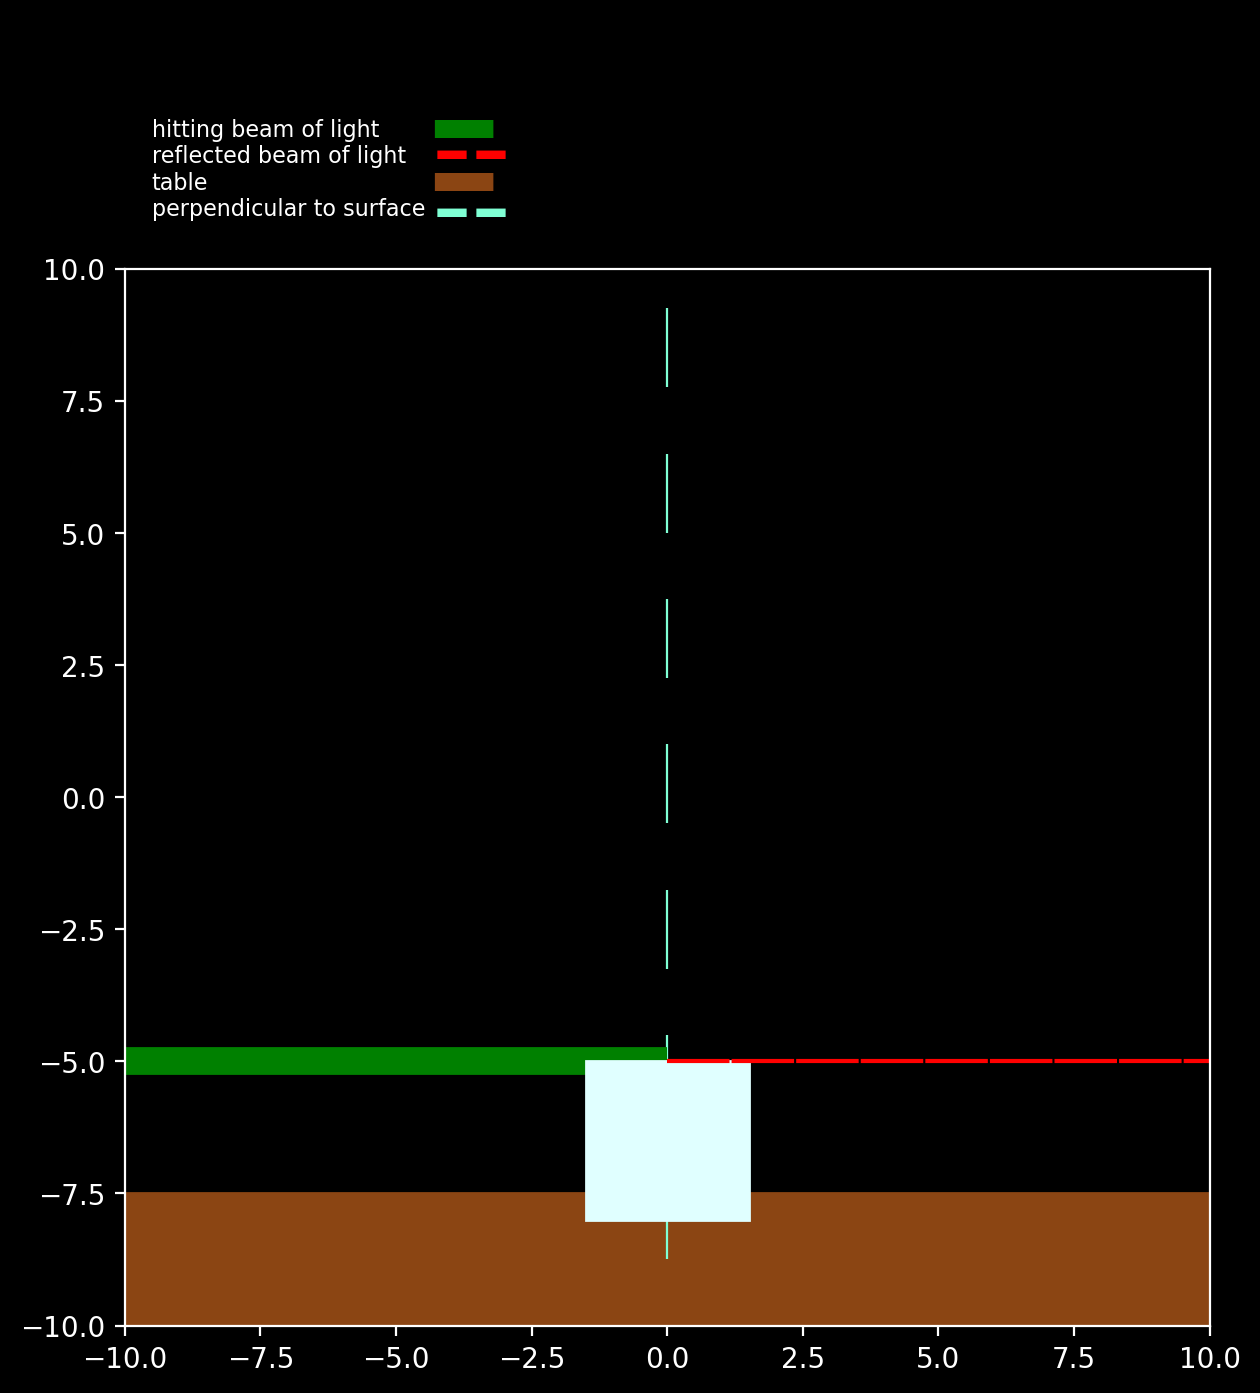

In [2]:
import matplotlib.pyplot as plt
import math

#בניית משטח הציור
plt.style.use("dark_background")
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7,7)
#plt.style.use("dark_background") #רקע כהה
ax = plt.axes(xlim= (-10,10), ylim= (-10,10)) #הגדרת התחום של הצירים


table = plt.Polygon([[-10,-10],[-10,-7.5],[10,-7.5],[10,-10]],lw = 1 , ec = 'saddlebrown', fc= 'saddlebrown')#שרטוט השולחן שעליו יהיו החומרים
ax.add_patch(table)#הוספת השרטוט


#נשרטט מקרא על מנת לאפשר הבנה קלה יותר של הסימולציה
plt.text(-9.5,11,'hitting beam of light\nreflected beam of light\ntable\nperpendicular to surface', fontsize = 8) #טקסט למקרא
plt.text(-4.5,11.5,'-', fontsize = 80, c = 'g') 
plt.text(-4.35,11.6,'--', fontsize = 40, c = 'red')
plt.text(-4.5,10.5,'-', fontsize = 80, c = 'saddlebrown')
plt.text(-4.35,10.5,'--', fontsize = 40, c = 'aquamarine')


def kivkuv():
    """the function doesn't get arguments and draw the verical to the second material"""
    xx,yy1 = 0, 12
    for k in range(30): #לולאה שתרוץ 8 פעמים ותשרטט את הקווים
        yy1 = yy1 - 2.75
        yy2 = yy1 -1.5
        #שרטוט על פי הנקודות בצירים
        kav = plt.Polygon([[xx,yy1],[xx,yy2]],lw = 0.8 , ec = 'aquamarine', fc= 'white')
        ax.add_patch(kav) #הוספה של השרטוט

kivkuv() #קריאה לפונקציה

def EquationLine1(theta_in):
    """float theta_in --> no arguments
    the function get the float number theta_in. this is the angle of the hitting light beam.
    the function doesn't return arguments and draw the hitting beam"""
    x1 = -10
    m1 = math.tan(math.radians(theta_in + 90))#מציאת השיפוע תוך העברה מזוויות לרדיאנים
    b = (-m1 * 0) + (-5)#מציאת איבר חופשי
    y1 = (m1*x1) + b #מציאת שיעור הוואי של מקום יציאת הלייזר
    RayIn = plt.Polygon([[x1,y1],[0,-5]], lw = 10, ec = "g", fc = "g") #הגדרת הנקודות
    ax.add_patch(RayIn) #הוספת השרטוט
    A = (x1,y1) #הנקודה שממנה הלייזר יוצא

def EquationLine2(theta_in, final_intensity):
    """folat theta_in, tuple final_intensity --> no arguments
    the function get the float number theta in. the angle of the hitting beam.
    the function doesn't return arguments and draw the returned beam of light"""
    m2 = math.tan(math.radians(90-theta_in))#מציאת השיפוע תוך העברה מזוויות לרדיאנים
    b = (-m2 * 0) + (-5)#מציאת איבר חופשי 
    y2 = (m2*+10) + b
    x,y = [0,10],[-5, y2] #רשימות ערכי שני הצירים 
    line2=plt.plot(x,y, dashes=[15, 0.5/(final_intensity[0]/100)],color = "r") #קרן חוזרת

def Special_Line():
    """the function doesn't get and return arguments.
    the function draw the situation when the beam of light hitting the material whitout some angle"""
    first_line = plt.Polygon([[0, 10], [0, -5]], lw = 20, ec = "g", fc = "g") #הקרן הפוגעת
    ax.add_patch(first_line) #הוספת הצורה
    x,y = [0,0],[-5,10] #רשימות ערכי הצירים
    second_line = plt.plot(x,y, dashes=[15, 0.5/(final_intensity[0]/100)],color = "r") #הקרן החוזרת


#כעת נבנה פונקציות לציור המשטחים של החומרים השונים בהם תפגע קרן האור

def PlotIce():
    """the function doesn't get and return arguments.
    plotting the material ice."""
    ice = plt.Polygon([[-1.5,-8],[-1.5,-5],[1.5,-5],[1.5,-8]],lw = 1 , ec = 'lightcyan', fc= 'lightcyan')
    ax.add_patch(ice)

def PlotGlass():
    """the function doesn't get and return arguments.
    plotting the material glass"""
    glass = plt.Polygon([[-1.5,-8],[-1.5,-5],[1.5,-5],[1.5,-8]],lw = 1 , ec = 'white') 
    ax.add_patch(glass)

def PlotWater():
    """the function doesn't get and return arguments.
    plotting the material water"""
    water = plt.Polygon([[-1,-8.25],[-2,-5],[2,-5],[1,-8.25]],lw = 1 , ec = 'b', fc= 'b')
    glass = plt.Polygon([[-1,-8.25],[-2.5,-5],[2.5,-5],[1,-8.25]],lw = 1 , ec = 'white', alpha = 0.5)
    ax.add_patch(water)
    ax.add_patch(glass)

def PlotAcetone():
    """the function doesn't get and return arguments.
    plotting the material acetone"""
    ace = plt.Polygon([[-1,-8.25],[-2,-5],[2,-5],[1,-8.25]],lw = 1 , ec = 'pink', fc= 'pink')
    glass = plt.Polygon([[-1,-8.25],[-2.5,-5],[2.5,-5],[1,-8.25]],lw = 1 , ec = 'white', alpha = 0.5)
    ax.add_patch(ace)
    ax.add_patch(glass)

def PlotMilk():
    """the function doesn't get and return arguments.
    plotting the material milk"""
    milk = plt.Polygon([[-1,-8.25],[-2,-5],[2,-5],[1,-8.25]],lw = 1 , ec = 'white', fc= 'white')
    glass = plt.Polygon([[-1,-8.25],[-2.5,-5],[2.5,-5],[1,-8.25]],lw = 1 , ec = 'silver', alpha = 0.5)
    ax.add_patch(milk)
    ax.add_patch(glass)

def PlotOil():
    """the function doesn't get and return arguments.
    plotting the material oil"""
    oil = plt.Polygon([[-1,-8.25],[-2,-5],[2,-5],[1,-8.25]],lw = 1 , ec = 'yellow', fc= 'yellow', alpha = 0.7)
    glass = plt.Polygon([[-1,-8.25],[-2.5,-5],[2.5,-5],[1,-8.25]],lw = 1 , ec = 'silver', alpha = 0.5)
    ax.add_patch(oil)
    ax.add_patch(glass)

#מילון המכיל קריאות לפונקציות הציור שנכתבו למעלה. המפתח מהווה את החומר שהמשתמש רוצה לצייר והערך מכיל את הקריאה לפונקצייה שמציירת את אותו החומר שיש במפתח
functions_to_draw = {'water' : [PlotWater], 'glass' : [PlotGlass], 'ice' : [PlotIce], 'milk' : [PlotMilk] , 'olive oil' : [PlotOil], 'acetone' : [PlotAcetone]}

def draw(func_list):
    """list with function --> no arguments
    the function get a list with one function and call the function"""
    for i in func_list: #מעבר על הפונקצייה ברשימה
        i() #קריאה לאותה הפונקצייה

# הדפסת הודעה מתאימה בעלת תוכן על עוצמת הקרן המוחזרת לאחר הפגיעה במשטח
print('When the light beam hits the', simulate_data['material'], 'the percent reflection of the beam is: ', final_intensity[0], "%") 
# הדפסת הודעה מתאימה בעלת תוכן על כמות ההחזרה מאותו חומר באחוזים כתלות בזווית שהמשתמש הכניס
print('So the intensity is: ', final_intensity[1], "which is", final_intensity[0],"% of the light." )

if (simulate_data['theta_in'] == 0): #תנאי- אם הקרן פוגעת ללא זווית ביחס לאנך, כלומר פוגעת אנכית לתווך
    Special_Line() #קריאה לפונקציה
    func_list = functions_to_draw.get(simulate_data['material']) # משתנה המכיל רשימה ובתוכה הפונקצייה שמציירת את החומר לפי בחירת המשתמש
    draw(func_list) #קריאה לפונקצייה שמציירת את החומר
    plt.show() #הצגת הסימולציה

else:
    EquationLine1(simulate_data['theta_in']) #קריאה לפונקצית הבנייה של הקרן הפוגעת
    EquationLine2(simulate_data['theta_in'], final_intensity) #קריאה לפונקציה של הקרן המוחזרת
    func_list = functions_to_draw.get(simulate_data['material']) # משתנה המכיל רשימה ובתוכה הפונקצייה שמציירת את החומר לפי בחירת המשתמש
    draw(func_list) #קריאה לפונקצייה שמציירת את החומר
    plt.show() #הצגת הסימולציה

# <font color = black><div dir = rtl>  הצגת התוצאות באופן גרפי  </div></font>

### <font color = blue><div dir = rtl>  הרצת קטע קוד זה תצייר גרף המתאר את אחוז ההחזרה כתלות במקדם השבירה </div></font>

Text(0.5, 1.0, 'Reflected light(%) - Refractive Index(n)')

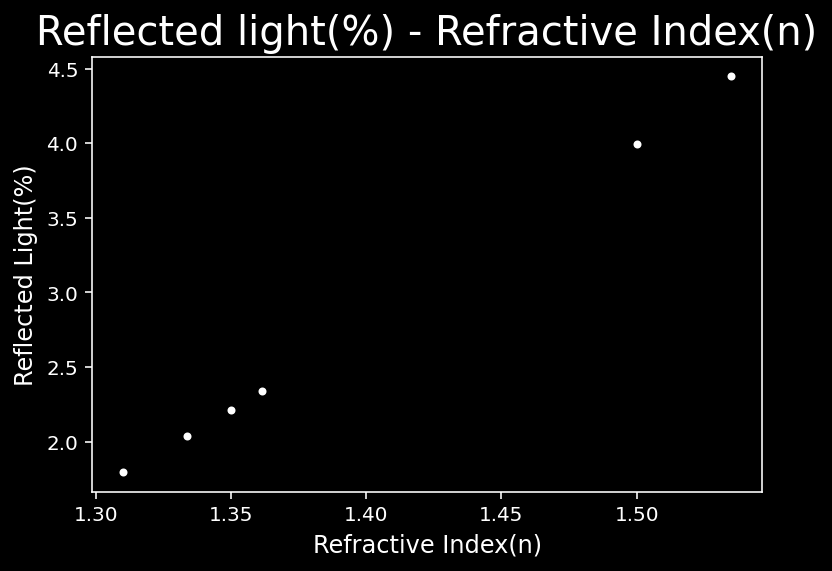

In [10]:
import matplotlib.pyplot as plt

def PercentReflectivity2 (n_index_list):
    """list refractive indexes --> list
    the function gets a list of refractive indexes and gives back
    the percent of the reflected light when it hits the surface
    without any angle for every refractive index. the funciton orgnized the data in list."""
    ls = [] #יצירת רשימה שתכיל את התוצאות
    for i in n_index_list: #לולאה שעוברת על כל מקדמי השבירה
        theta_refracted = snell_law(simulate_data['n1'], i, 0) #חישוב זווית השבירה תוך שימוש בפונקציית סנל
        rs = Rs(simulate_data['n1'], i, 0, theta_refracted) #אחוז ההחזרה עבור קיטוב מסוג זה
        rp = Rp(simulate_data['n1'], i, 0, theta_refracted) #אחוז ההחזרה עבור קיטוב מסוג זה 
        r_avg = 0.5 * (rp + rs) #אחוז ההחזרה עבור אור לא מקוטב
        ls.append(r_avg * 100) #הוספת אחוז ההחזרה לרשימה
    return (ls) #הפונקציה מחזירה את הרשימה

x = simulate_data['n_index_list'] #רשימת ערכי איקס - מקדמי השבירה
y = PercentReflectivity2(simulate_data['n_index_list']) #רשימת ערכי וואי 
plt.plot(x, y, "w.") #סרטוט הגרף
#כותרות לצירים ולגרף
plt.xlabel("Refractive Index(n)", fontsize = 12 )
plt.ylabel("Reflected Light(%)",fontsize = 12)
plt.title("Reflected light(%) - Refractive Index(n)", fontsize = 20)

##### <font color = blue><div dir = rtl>  הרצת קטע קוד זה תצייר גרף המתאר את אחוז ההחזרה כתלות בזווית הפגיעה עבור כל החומרים הנתונים ומציגה אופצייה לבידוד אחד מהם על פי בחירת המשתמש </div></font>

do you want to isolate one of the materials? (yes / no) yes

which material do you want to isolate? ['water', 'glass', 'ice', 'milk', 'olive oil', 'acetone']


material =  milk

material =  

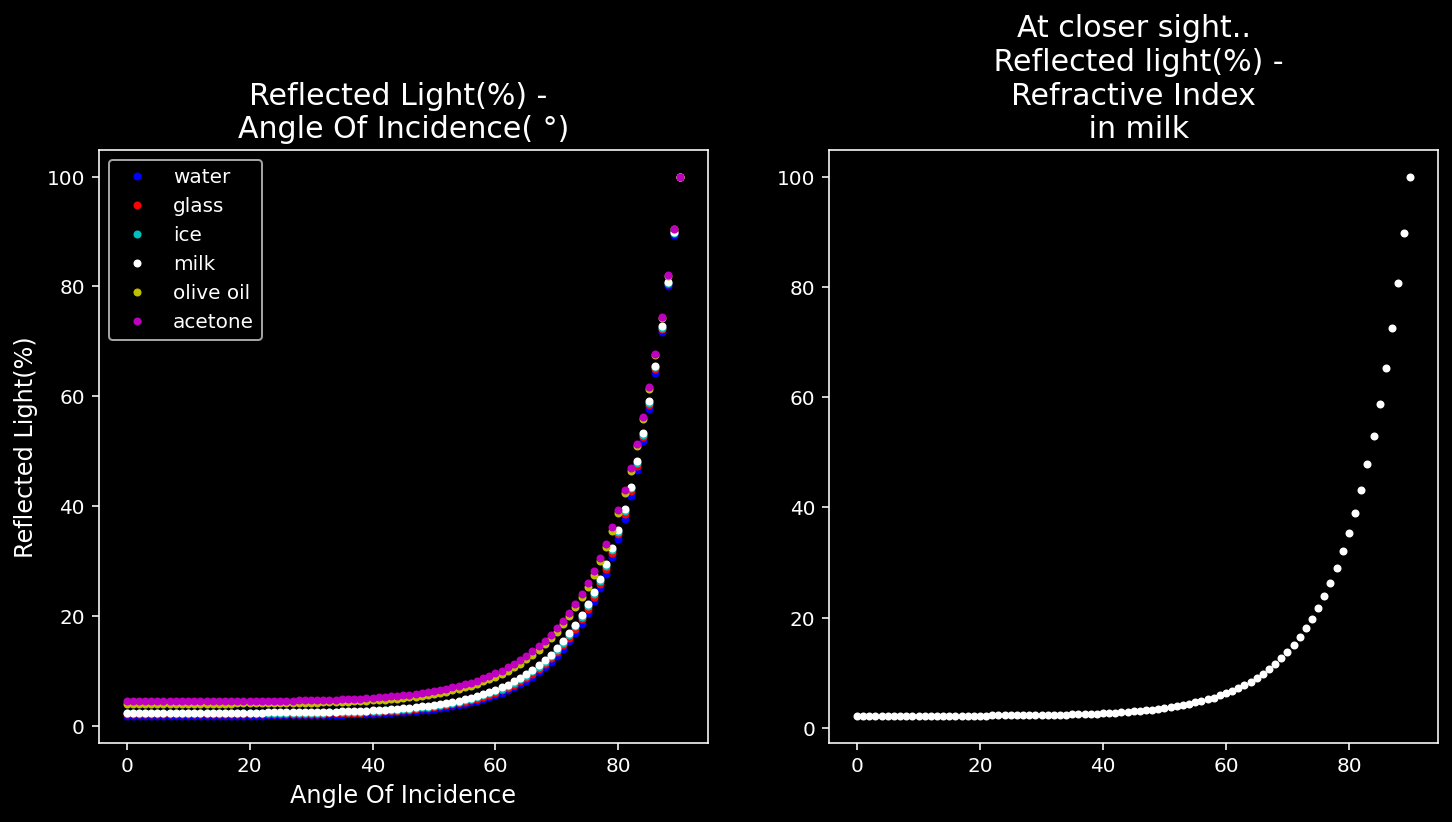

In [17]:
import matplotlib.pyplot as plt
bx = plt.figure()
bx.set_size_inches(12,12)
bx = plt.subplot(2, 2, 1 ) # על מנת שיהיה מקום לכמה גרפים

colors = ['b.', 'r.', 'c.', 'w.', 'y.', 'm.']

def PercentReflectivity1(n1, theta_in_list, n_index_list):
    """float n1, list theta_in_list, list n_index_list --> list of floats
    the function get the refractive index of the air, list of all the posible angles and all the refractive indexes of all the materials.
    the function return huge list with a lot of little lists. every list it's all the reflactive light for one material."""
    ls_alpha = [] #רשימה שתכיל את כל הרשימות הקטנות
    for i in n_index_list: #לולאה שתרוץ על כל מקדמי השבירה
        ls = [] #רשימה עבור מקדם שבירה מסוים
        for k in theta_in_list: #לולאה שתרוץ על כל זוויות הפגיעה האפשריות
            theta_refracted = snell_law(n1, i, k) #זווית השבירה על ידי חוק סנל
            rs = Rs(n1, i, k, theta_refracted) #חישוב אחוז ההחזרה לסוג קיטוב זה
            rp = Rp(n1, i, k, theta_refracted) #חישוב אחוז החזרה עבור סוג קיטוב זה
            r_avg = 0.5 * (rp + rs) #אחוז ההחזרה עבור אור לא מקוטב
            ls.append(r_avg * 100) # הוספת אחוז החזרה זה לרשימה
        ls_alpha.append(ls) #הוספת הרשימה לרשימת רשימות
    return ls_alpha #מחזיר את הרשימה 

def half_PercentReflectivity1(n1, isolate_material, theta_in_list):
    """float n1, string isolate_material, list theta_in_list --> list of reflactive percent of the specific mateiral
    the function calculate the percent of reflactive for all the angles for the material which the user picked up"""
    ls = [] #רשימה שתכיל את הערכים
    for i in theta_in_list: #ריצה על כל הזוויות
        theta_refracted = snell_law(n1, isolate_material, i) #חישוב זווית השבירה באמצעות חוק סנל
        rs = Rs(n1, isolate_material, i, theta_refracted) #חישוב אחוז ההחזרה לסוג קיטוב זה
        rp = Rp(n1, isolate_material, i, theta_refracted)#חישוב אחוז ההחזרה לסוג קיטוב זה
        r_avg = 0.5 * (rp + rs) #אחוז ההחזרה עבור אור לא מקוטב
        ls.append(r_avg * 100) #הוספתו לרשימה
    return(ls) #החזרת הרשימה

reflect_list = PercentReflectivity1(simulate_data['n1'], simulate_data['theta_in_list'], simulate_data['n_index_list']) #השמת הרשימה של הפונקציה למשתנה

for i in range(len(reflect_list)): #ריצה על אורך הרשימה בעלת כל החומרים, מהווה את כמות החומרים בניסוי
    #מסרטט עבור כל חומר את אחוז ההחזרה שלו כתלות בזווית הפוגעת
    plt.plot(simulate_data['theta_in_list'], reflect_list[i], colors[i], label=simulate_data['material_list'][i])

plt.xlabel("Angle Of Incidence", fontsize = 12,) #כותרת ציר איקס
plt.ylabel("Reflected Light(%)",fontsize = 12) #כותרת ציר וואי
plt.title("Reflected Light(%) - \nAngle Of Incidence( °)", fontsize = 15) #כותרת 
bx.legend()

while True: #הלולאה בודקת את תקינות התשובה מהמשתמש
    iso = input('do you want to isolate one of the materials? (yes / no)') #שואל את המשתמש אם הוא רוצה לראות גרף בנפרד של אחד החומרים
    if iso == 'yes' or iso == 'no': #לשבור את הלולאה אם התשובה היא כן או לא
        break #יציאה מהלולאה
    print('Error! invalid value. Please type valid value.') #במידה והתשובה לא תקינה המשתמש יוכל להכניס לקלט את תשובת

if (iso == 'yes'): #במידה והתשובה היא כן
    print('which material do you want to isolate?', simulate_data['material_list']) #מראה את רשימת המחומרים למשתמש 

    while True:
        iso_n = input('material = ') #יקבל את בחירת המשתמש כקלט
        if n_by_materials.get(iso_n) != None: #בדיקת נוכחות החומר שנבחר במילון החומרים
            break #יציאה מהלולאה
        print('Error! invalid value. Please type valid value.') #הדפסת הודעה מתאימה
    
    isolate_material_list = half_PercentReflectivity1(simulate_data['n1'], n_by_materials[iso_n], simulate_data['theta_in_list']) #בונה את הגרף לחומר שנבחר
    cx = plt.subplot(2, 2, 2) #גרף נוסף
    plt.plot(simulate_data['theta_in_list'], isolate_material_list,  colors[simulate_data['material_list'].index(iso_n)]) #הגרף יבנה בנקודותת וימחיש את תלות אחוז ההחזרה של החומר בזווית הפגיעה
    plt.title("At closer sight..\n Reflected light(%) -\nRefractive Index\n in " + iso_n, fontsize = 15) #כותרת הגרף

print('Done') #כותב לאחר ביצוע הפקודה